# GOA-ON Inventory Summary

by Landung Setiawan and Emilio Mayorga

This ipython notebook goes through the GOA-ON Inventory from a WFS Endpoint and extract information attributes that in principle should be based on a vocabulary, or should have limited, repeated terms/strings:
`source_doc`, `platform_type`, `type`, `organization`, `country`, and `parameters`. 

Updates:
- 9/19/2017. Add map of inventory and use WFS instead of Google sheets.[`lsetiawan`](https://github.com/lsetiawan)
- 7/10/2017. Initial counts for Parameter, Platform Type, Source Doc, Type, Organization, and Country. [`lsetiawan`](https://github.com/lsetiawan)

---

## Reading WFS Endpoint into Pandas Data Frame

In [1]:
# Import Necessary Libraries
%matplotlib inline
import os

import numpy as np
import pandas as pd
import requests
import geojson
import matplotlib.pyplot as plt

import geopandas as gpd
from geopandas import GeoDataFrame


import vizer.tsharvest.util as vhutil

In [2]:
wfs_url = "http://data.nanoos.org/geoserver/ows"
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='oa:goaoninv', outputFormat='json')

r = requests.get(wfs_url, params=params)
wfs_geo = geojson.loads(r.content)

In [3]:
vizername = 'goaon'
bOpenDB = False

In [4]:
vizer = vhutil.Vizer(vizername, bOpenDB)

In [5]:
# Open WFS Geojson worksheet
df_xls = GeoDataFrame.from_features(wfs_geo)

In [6]:
df_xls.head()

,Oceans,additional_organizations,agency,city,comments,comments_about_overlaps,contact_email,contact_name,country,data_url,...,platform_name_kml,platform_type,point_xy,project,sensors,source_doc,track_pt_lat,track_pt_lon,type,url
0,North Atlantic Ocean,,Israeli Ministry of Infrastructure,Haifa,,,jacobs1@ocean.org.il,Jacob Silverman,Israel,,...,None,FOTS,None,,,FixedTimeSeries,None,None,IOLR Coastal Beach Rock Monitoring,http://www.ocean.org.il/MainPageEng.asp
1,North Pacific Ocean,,National Science Foundation (NSF),,"For a full listing of parameters, contact kris...",,mengeb@oregonstate.edu,Bruce Menge,US,,...,None,FOTS,None,Ocean Margin Ecosystem Group for Acidification...,GIFET (pH),FixedTimeSeries,None,None,Intertidal (surf-zone) station,http://omegas.science.oregonstate.edu/
2,North Pacific Ocean,Santa Barbara Coastal Long Term Ecological Res...,George Melendez Wright Climate Change Fellowsh...,,,,lydia.kapsenberg@lifesci.ucsb.edu,Lydia Kapsenberg,US,,...,None,FOTS,None,,SeaFET (pH),FixedTimeSeries,None,None,Pier-mounted sensor,http://hofmannlab.msi.ucsb.edu/
3,North Pacific Ocean,,Canadian Foundation for Innovation (CFI); Prov...,,,,denmank@uvic.ca,Kenneth Denman,Canada,,...,None,OP,None,,,FixedTimeSeries,None,None,NEPTUNE Canada Vertical Profiler,http://www.neptunecanada.ca/
4,North Atlantic Ocean,,Federal Maritime and Hydrographic Agency,,,,sieglinde.weigelt@bsh.de,Sieglinde Weigelt-Krenz,,,...,None,FOTS,None,,Sea &amp; sun CTD 48; APP Automatic Pump Photo...,FixedTimeSeries,None,None,Unmanned Fireship,


---
## Getting Parameter Counts

In [7]:
params_rec = list()
for i, df in df_xls.iterrows():
    parameters_str = df['parameters']
    param_lst = [token.strip() for token in parameters_str.split(';')]
    np_params = np.array(param_lst)
    unique, counts = np.unique(np_params, return_counts=True)
    
    params_rec.append(dict(zip(unique, counts)))

df_params = pd.DataFrame.from_records(params_rec)

**Note: There are some blanks, and strings not formatted correctly**

In [8]:
list(df_params.columns)

[u'',
 '13-C',
 '14-C',
 '18O-H2O',
 'Alkalinity',
 'Beam Att.',
 'C',
 'C flux',
 'CDOM',
 'CDOM fluorescence',
 'CFC',
 'CH4',
 'CO2_Water',
 'CO2_air',
 'CO2_sw',
 'Chlorophyll',
 'Chlorphyll',
 'DIC',
 'DIC-d13C',
 'DMS',
 'DOC',
 'DOM',
 'Disco Secchi',
 'Dissolved O2',
 'Dissolved oxygen',
 'Fe',
 'Fluorescence',
 'H2SO4',
 'HPLC',
 'Kd',
 'N flux',
 'N2O',
 'NO3',
 'Nutrients',
 'P flux',
 'PIC',
 'PO4',
 'POC',
 'SF6',
 'Salinity',
 'Sechi',
 'Si flux',
 'Sigma-t',
 'TCO2',
 'TDN',
 'TN',
 'Temperature',
 'Total Alkalinity (TA)',
 'Turbidity',
 'air pCO2',
 'air temperature',
 'alkalinity',
 'ammonium',
 'atmospheric pressure',
 'backscattering',
 'bacteria',
 'bacterial abundance',
 'bacterial production',
 'bacterial respiration rate',
 'biogenic particulate Si',
 'chlorophyll',
 'chlorophyll/pigments',
 'chloropigment',
 'cholorphyll/pigments',
 'conductivity',
 'copepod egg production',
 'current',
 'current direction',
 'current speed',
 'cyanobacteria',
 'd15N',
 'd18O',


In [9]:
param_counts = df_params.count()

In [10]:
param_counts

                                       72
13-C                                    2
14-C                                    1
18O-H2O                                 1
Alkalinity                              1
Beam Att.                              28
C                                       2
C flux                                 22
CDOM                                    2
CDOM fluorescence                       1
CFC                                    29
CH4                                     2
CO2_Water                               1
CO2_air                                36
CO2_sw                                 40
Chlorophyll                             1
Chlorphyll                              1
DIC                                     1
DIC-d13C                                9
DMS                                     3
DOC                                     1
DOM                                     1
Disco Secchi                            1
Dissolved O2                      

---
## Get Platform Type Counts

In [11]:
df_xls['platform_type'].value_counts(dropna=False)

STS_X    196
M        126
FOTS      97
STS       39
OP        30
VOS       29
RH        27
Name: platform_type, dtype: int64

---
## Get Source Doc Counts with Platform Type

In [12]:
df_cleaned_pt = df_xls.fillna({'Platform_type': 'NA'})

In [13]:
df_cleaned_pt.groupby(['source_doc', 'platform_type']).size()

source_doc               platform_type
Bjoern_Times_Series_OCB  M                  3
                         OP                26
                         STS_X            187
Email_request            FOTS               1
                         M                  7
Fixed Ocean Time Series  FOTS               2
FixedTimeSeries          FOTS              78
                         OP                 2
                         STS_X              8
Mooring                  FOTS               2
                         M                103
                         OP                 2
OOI                      M                 13
RepeatHydrography        RH                27
ShipbasedTime_Series     STS               39
VOS                      VOS               28
WESTPAC                  FOTS              11
on-line request          FOTS               3
                         STS_X              1
                         VOS                1
dtype: int64

---
## Get Type Counts

In [14]:
df_xls['type'].value_counts(dropna=False)

                                                                                                      342
NOAA OA Coral Reef Monitoring Site                                                                     20
Intertidal (surf-zone) station                                                                         15
OA/pCO2 Mooring (Coastal)                                                                              14
ChloroGIN - ANTARES Station                                                                            11
OA/pCO2 Mooring (Open Ocean)                                                                            9
Inner-shelf mooring (15-20 meter depth)                                                                 8
Open Ocean Mooring                                                                                      8
OA/pCO2 Mooring (Coral Reef)                                                                            7
IOLR Hydrographic cruise station              

---
## Get Organization Counts

In [15]:
df_cleaned_org = df_xls.fillna({'organization': 'NA'})

**Note: There are some Repeating Organization or Similar, but spelled differently.**

In [16]:
df_cleaned_org.groupby(['organization', 'country']).size()

organization                                                                          country      
                                                                                                       18
                                                                                      Argentina         4
                                                                                      Australia         5
                                                                                      Belgium           1
                                                                                      Brazil            2
                                                                                      Canada           43
                                                                                      Chile             4
                                                                                      China             3
                                                    

---
## Get Country Counts

In [17]:
country_counts = df_xls['country'].value_counts(dropna=False)

In [18]:
country_counts

US                  150
Canada               58
                     45
France               30
UK                   28
Mexico               24
Spain                20
Australia            19
Norway               19
Chile                13
Israel               11
Japan                10
Germany              10
Italy                 8
Brazil                6
China                 6
South Africa          6
Ireland               5
Korea                 5
Sweden                4
Colombia              4
Peru                  4
Argentina             4
Iceland               4
Denmark               4
India                 4
Finland               4
Venezuela             3
Thailand              3
New Zealand           3
Estonia               2
Viet Nam              2
Poland                2
Malaysia              2
Indonesia             2
Latvia                2
Croatia               2
Portugal              2
Kuwait                1
Faroe Islands         1
Scotland              1
Taiwan          

---

## Map Inventory

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

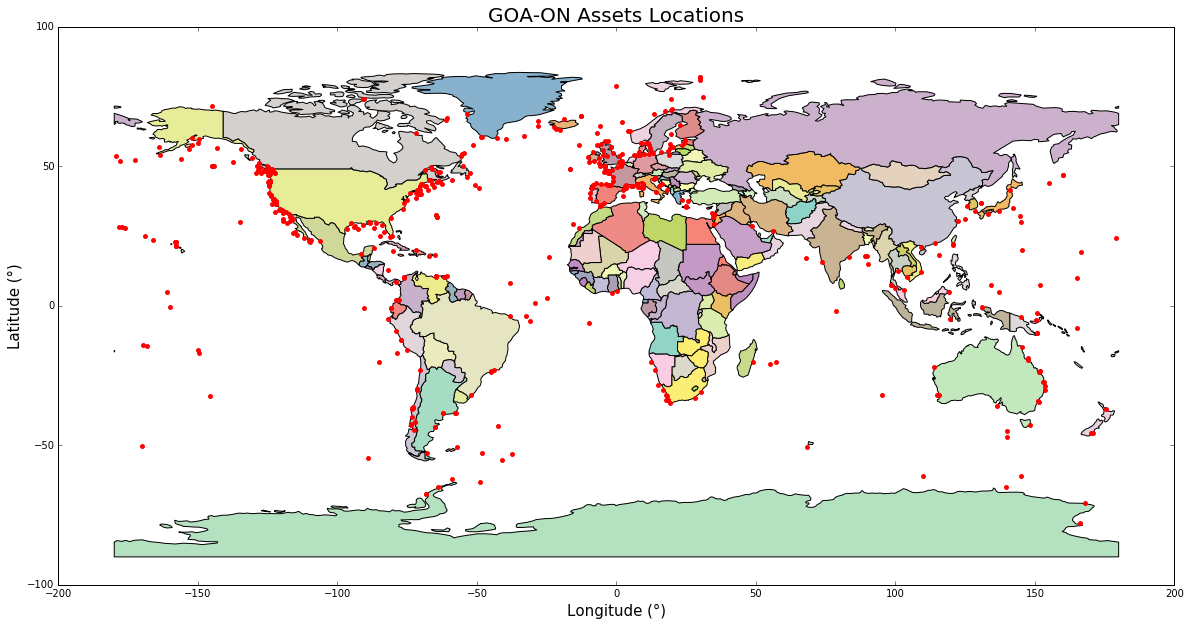

In [20]:
df_xls.plot(ax=world.plot(cmap='Set3', figsize=(20, 16)),
             marker='o', color='red', markersize=15);
plt.title('GOA-ON Assets Locations', {'fontsize': 20})
plt.xlabel(u'Longitude (°)', {'fontsize': 15})
plt.ylabel(u'Latitude (°)', {'fontsize': 15})

---